In [3]:
import numpy as np  # 导入NumPy数学工具箱
import pandas as pd  # 导入Pandas数据处理工具箱

# 评估心脏健康状况
# 已经处理过的数据，减少了很多格式转换的工作
df_heart = pd.read_csv("./data/heart.csv")  # 读取文件
df_heart.head()  # 显示前5行数据

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df_heart.target.value_counts()  # 输出分类值，及各个类别数目

1    165
0    138
Name: target, dtype: int64

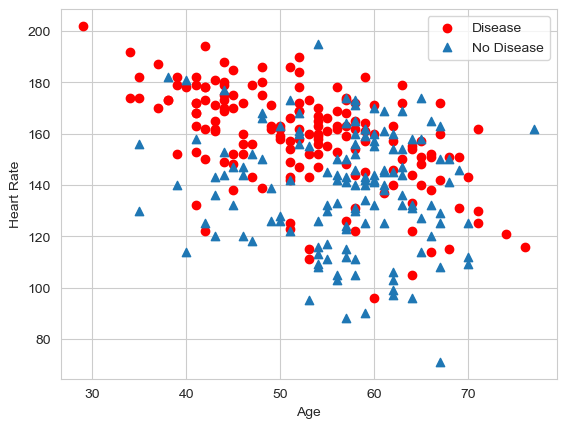

In [3]:
import matplotlib.pyplot as plt

# 以年龄+最大心率作为输入，查看分类结果散点图
plt.scatter(x=df_heart.age[df_heart.target == 1],
            y=df_heart.thalach[(df_heart.target == 1)], c="red")
plt.scatter(x=df_heart.age[df_heart.target == 0],
            y=df_heart.thalach[(df_heart.target == 0)], marker='^')
plt.legend(["Disease", "No Disease"])  # 显示图例
plt.xlabel("Age")  # X轴-Age
plt.ylabel("Heart Rate")  # Y轴-Heart Rate
plt.show()  # 显示散点图

In [4]:
# 把3个文本型变量转换为哑变量
a = pd.get_dummies(df_heart['cp'], prefix="cp")
b = pd.get_dummies(df_heart['thal'], prefix="thal")
c = pd.get_dummies(df_heart['slope'], prefix="slope")
# 把哑变量添加进dataframe
frames = [df_heart, a, b, c]
df_heart = pd.concat(frames, axis=1)
df_heart = df_heart.drop(columns=['cp', 'thal', 'slope'])
df_heart.head()  # 显示新的dataframe

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [5]:
X = df_heart.drop(['target'], axis=1)  # 构建特征集
y = df_heart.target.values  # 构建标签集
y = y.reshape(-1, 1)  # -1是相对索引，等价于len(y)
print("张量X的形状:", X.shape)
print("张量X的形状:", y.shape)

张量X的形状: (303, 21)
张量X的形状: (303, 1)


In [6]:
from sklearn.model_selection import train_test_split

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import MinMaxScaler  # 导入数据缩放器

# 上一课是自己写函数，这次直接用Sklearn中内置的数据缩放器Min Max Scaler，进行数据的归一化
scaler = MinMaxScaler()  # 选择归一化数据缩放器，MinMaxScaler
# 注意训练集和测试集使用的方法不同。
#fit_transform 先拟合再应用 
X_train = scaler.fit_transform(X_train)  # 特征归一化 训练集fit_transform
#transform 直接应用
X_test = scaler.transform(X_test)  # 特征归一化 测试集transform

In [9]:
# 首先定义一个Sigmoid函数，输入Z，返回y'
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [10]:
# 然后定义损失函数
def loss_function(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)  # Sigmoid逻辑函数 + 线性函数(wX+b)得到y'
    loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))  # 计算损失
    cost = np.sum(loss) / X.shape[0]  # 整个数据集平均损失    
    return cost  # 返回整个数据集平均损失

In [11]:
# 然后构建梯度下降的函数
def gradient_descent(X, y, w, b, lr, iter):  #定义逻辑回归梯度下降函数
    l_history = np.zeros(iter)  # 初始化记录梯度下降过程中误差值(损失)的数组
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))  # 初始化权重记录的数组
    b_history = np.zeros(iter)  # 初始化记录梯度下降过程中偏置的数组  
    for i in range(iter):  #进行机器训练的迭代
        y_hat = sigmoid(np.dot(X, w) + b)  #Sigmoid逻辑函数+线性函数(wX+b)得到y'
        derivative_w = np.dot(X.T, ((y_hat - y))) / X.shape[0]  # 给权重向量求导，就是损失函数的微分
        derivative_b = np.sum(y_hat - y) / X.shape[0]  # 给偏置求导
        w = w - lr * derivative_w  # 更新权重向量，lr即学习速率alpha
        b = b - lr * derivative_b  # 更新偏置，lr即学习速率alpha
        l_history[i] = loss_function(X, y, w, b)  # 梯度下降过程中的损失
        print("轮次", i + 1, "当前轮训练集损失：", l_history[i])
        w_history[i] = w  # 梯度下降过程中权重的历史 请注意w_history和w的形状
        b_history[i] = b  # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history


In [12]:
def predict(X, w, b):  # 定义预测函数
    z = np.dot(X, w) + b  # 线性函数
    y_hat = sigmoid(z)  # 逻辑函数转换
    y_pred = np.zeros((y_hat.shape[0], 1))  # 初始化预测结果变量  
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i, 0] = 0  # 如果预测概率小于0.5，输出分类0
        else:
            y_pred[i, 0] = 1  # 如果预测概率大于0.5，输出分类1
    return y_pred  # 返回预测分类的结果

In [22]:
def logistic_regression(X, y, w, b, lr, iter):  # 定义逻辑回归模型
    l_history, w_history, b_history = gradient_descent(X, y, w, b, lr, iter)  #梯度下降
    print("训练最终损失:", l_history[-1])  # 打印最终损失
    y_pred = predict(X, w_history[-1], b_history[-1])  # 进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100  # 计算准确率
    print("逻辑回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return l_history, w_history, b_history  # 返回训练历史记录

In [28]:
#初始化参数
dimension = X.shape[1]  # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension, 1), 0.1)  # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0  # 偏置值
#初始化超参数
alpha = 1  # 学习速率
iterations = 500  # 迭代次数

In [29]:
# 用逻辑回归函数训练机器
loss_history, weight_history, bias_history = logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

KeyboardInterrupt: 

In [16]:
y_pred = predict(X_test, weight_history[-1], bias_history[-1])  # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100  # 计算准确率
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 85.25%


In [17]:
print("逻辑回归预测分类值:", predict(X_test, weight_history[-1], bias_history[-1]))

逻辑回归预测分类值: [[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


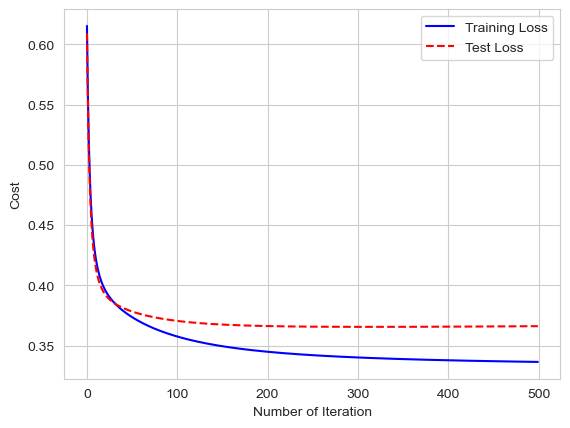

In [18]:
loss_history_test = np.zeros(iterations)  # 初始化历史损失
for i in range(iterations):  #求训练过程中不同参数带来的测试集损失
    loss_history_test[i] = loss_function(X_test, y_test,
                                         weight_history[i], bias_history[i])
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='blue', linestyle='solid')
plt.plot(index, loss_history_test, c='red', linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show()  # 同时显示显示训练集和测试集损失曲线

In [19]:
from sklearn.linear_model import LogisticRegression  #导入逻辑回归模型

lr = LogisticRegression()  # lr,就代表是逻辑回归模型
lr.fit(X_train, y_train)  # fit,就相当于是梯度下降
print("SK-learn逻辑回归测试准确率{:.2f}%".format(lr.score(X_test, y_test) * 100))


SK-learn逻辑回归测试准确率81.97%


/Users/ykdsg/miniforge3/envs/SmartInvest/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
